**Deforestation and Recovery of the Tropical Montane forests of East Africa**

https://www.researchgate.net/publication/368713029_Deforestation_and_Recovery_of_the_Tropical_Montane_forests_of_East_Africa

In [ ]:
# number of top frequent words to consider when scoring sentences
# determine how sentence scores are calculated based on the distance between words
# number of sentences to include in the summary

all_sentences, best_sentences, sentences_score = summarize(all_text, 5, 2, 10)

In [ ]:
best_sentences

['After 20 years, the recovery rate slows down to 4.2 Mg ha-1 to attain the level of AGB measured in the old growth secondary forest.',
 'The current study shows that soil C stocks in the youngest secondary forest were 184.1 ± 41Mg C ha -1 which was not significantly different from the soil C measured from the old growth secondary forest with 217.9 ± 51 Mg C ha-1, N stocks ranged from 16.4 ± 4.8 Mg N ha-1 in the youngest General discussion and conclusions 127 secondary forest to 20.1 ± 3.9 Mg N ha-1 in the old growth secondary forest.',
 '4 Mg ha-1.',
 'Table 4-3: Candidate models fitted to determine the relationship between the Total Soil Carbon (TSC) and Total Soil Nitrogen (TSN).',
 'Forest cover change classification was undertaken from the available Landsat satellite Quantification of soil carbon and nitrogen stocks along forest recovery stages in Tropical Montane Forest of East Africa 99 data was used to determine the time since first and last forest clearance took place and area

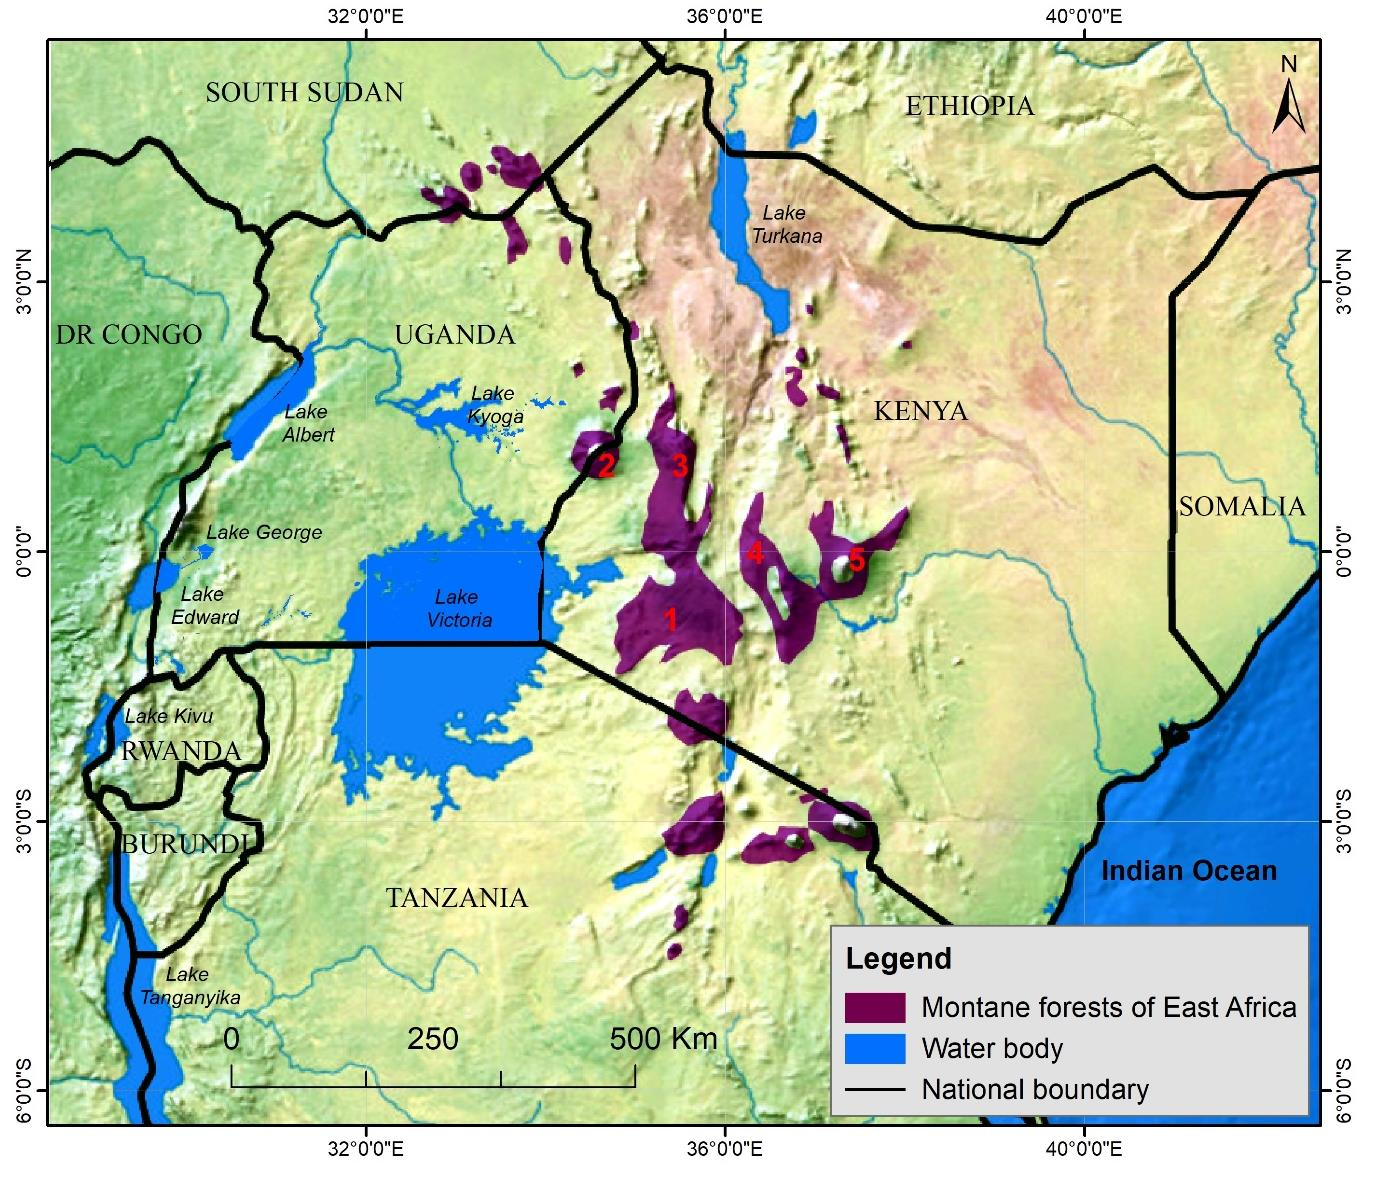

In [ ]:
display(Image('/content/images/15.jpeg'))

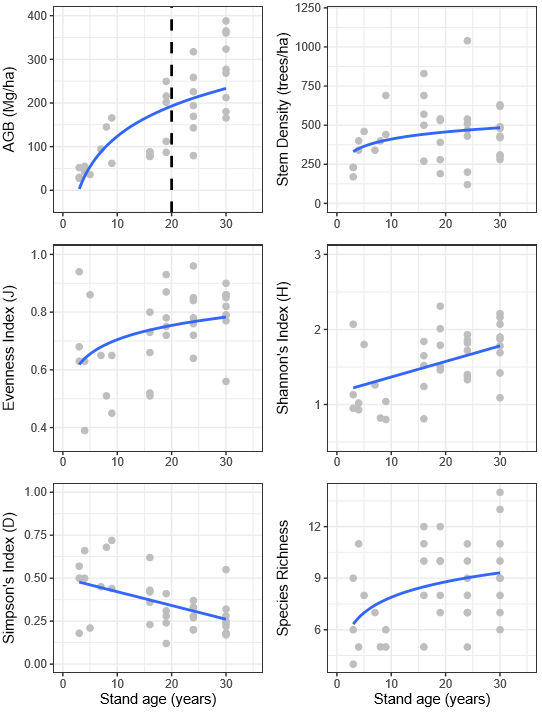

In [ ]:
display(Image('/content/images/211.png'))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function fit
from scipy.optimize import curve_fit

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# save output
import os
import csv

In [3]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

In [4]:
class TreeSpecies:
    def __init__(self, name, age, biomass, initial_guesses):
        self.name = name
        self.age = np.array(age)
        self.biomass = np.array(biomass)
        self.initial_guesses = initial_guesses
        self.params, _ = curve_fit(growth_curve, self.age, self.biomass, self.initial_guesses)
        self.plot()

    def plot(self):
        plt.scatter(self.age, self.biomass, label='data', marker='x', c='r')
        x = np.linspace(1, 50, 50)
        plt.plot(x, growth_curve(x, *self.params), 'b-', label='growth curve')

        plt.title(f'{self.name.upper()} GROWTH CURVE')
        plt.xlabel('Age (years)')
        plt.ylabel('AGB (Mg ha-1)')
        plt.legend()
        plt.xlim(1, 50)
        plt.show()
        print(f'Parameters: {self.params}')

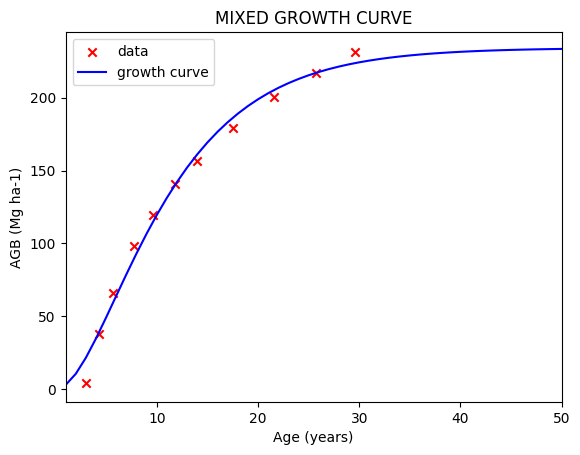

Parameters: [2.34277443e+02 1.29891935e-01 2.11527244e+00]


In [5]:
mixed = TreeSpecies('Mixed',
                         [3.020179697707807, 4.3030664752472045, 5.695804365008954, 7.7345829367831875, 9.669317503589117, 11.819882890003708, 13.97238397883632, 29.59301856661236, 21.618408529995325, 17.525365767102738, 25.713386995305928],
                         [3.9004403723001246,  37.47519881276918,  65.66386527511168,  97.85943574274518,  119.29734002226058,  140.7255657896859,  156.77253883502976,  231.40838481764075,  200.82428661300472, 179.4831675,  216.78415304953788],
                         [234.28, 0.13, 2.11])

In [ ]:
table_32 = dataframes[31]
table_32

,Unnamed: 0,Mau forest complex,Mt Elgon forest
0,Forest cover,NaN,NaN
1,NaN,Area (ha) (%),Area (ha) (%)
2,Permanent forest (1984 - 2017),"172,250 42.6","52,369 24.1"
3,Deforested area (2017),"88,493 21.9","27,201 12.5"
4,Forest under recovery (2017),"75,438 18.6","59,047 27.2"
5,Non-forest,"68,479 16.9","78,651 36.2"
6,Total,"404,660 100","217,268 100"


In [ ]:
table_47 = dataframes[46]
table_47

,Recovery,DBH Height,Stem density,BA,AGB AGC,Shannon's Evenness,Simpson's
0,stage (years),(cm) (m),(tree ha-1),(m2 ha-1),(Mg ha-1) (Mg C ha-1),(H) (J),(D)
1,<10,18.82 ± 2.13 11.02 ± 2.35 321.25 ± 101.34 11.4...,NaN,NaN,60.20 ± 40.32 28.30 ± 18.95,1.25 ± 0.45 0.66 ± 0.18 0.47 ± 0.19,NaN
2,10 - 15,18.83 ± 3.86 11.67 ± 1.82 570.00 ± 186.28 18.7...,NaN,NaN,91.14 ± 34.07 42.84 ± 16.02,1.27 ± 0.41 0.62 ± 0.13 0.46 ± 0.16,NaN
3,15 - 20,24.91 ± 2.64 13.63 ± 2.06 386.00 ± 153.40 24.3...,NaN,NaN,173.26 ± 70.02 81.43 ± 32.91,1.82 ± 0.36 0.81 ± 0.09 0.27 ± 0.11,NaN
4,20 - 25,27.21 ± 9.95 15.06 ± 2.08 472.86 ± 296.74 28.4...,NaN,NaN,198.32 ± 78.11 93.21 ± 36.71,1.63 ± 0.26 0.79 ± 0.10 0.28 ± 0.07,NaN
5,25 - 30,27.59 ± 4.98 16.17 ± 1.76 440.00 ± 130.00 35.6...,NaN,NaN,282.35 ± 82.88 132.70 ± 38.95 1.80 ± 0.36 0.80...,NaN,NaN
6,Mature,28.95 ± 7.06 14.81 ± 2.39 445.46 ± 187.58 39.5...,NaN,NaN,NaN,NaN,NaN


In [ ]:
table_48 = dataframes[47]
table_48

,Appendix 8: Identified and recorded species and the percentage composition in the 3 Blocks of Mau forest complex
0,No. of species recorded in each forest class C...
1,Family Species
2,10 15 20 25 30 Old-growth 10 15 20 25 30 Old-g...
3,Fabaceae Acasia lahai 2 - - - - - 0.66 - - - - -
4,Mimosaceae Acacia melanoxylon 35 - - - - - 11....
5,Ericaceae Agauria salicifolia 1 1 - - - - 0.33...
6,Mimosaceae Albizia gummifera 1 - 2 6 6 6 0.33 ...
7,Sapindaceae Allophylus abyssinicus - 2 3 1 11 ...
8,Sapotaceae Aningeria adolfi-friederici - - - -...
9,Melianthaceae Bersama abyssinica 1 - - 2 1 - 0...


In [ ]:
table_49 = dataframes[48]
table_49

,Cupre saceae,Juniperus procera,1,3,-,-.1,-.2,-.3,0.33,0.90,-.4,-.5,-.6,-.7
0,Euphorbiaceae,Macaranga kilimandscharica,-,2,3,12,1,25,-,0.60,1.54,3.60,0.25,5.20
1,Euphorbiaceae,Makaranga cabensis,2,35,5,12,7,25,0.66,10.45,2.56,3.60,1.77,5.20
2,Celastraceae,Maytenus heterophylla,2,7,-,-,-,-,0.66,2.09,-,-,-,-
3,Celastraceae,Mystroxylon aethiopicum,15,-,5,10,-,-,4.95,-,2.56,3.00,-,-
4,Euphorbiaceae,Neoboutonia macrocalyx,110,67,23,73,30,33,36.30,20.00,11.79,21.92,7.58,6.86
5,Stilbaceae,Nuxia congesta,-,2,-,-,-,-,-,0.60,-,-,-,-
6,Oleaceae,Olea africana,7,32,-,5,-,16,2.31,9.55,-,1.50,-,3.33
7,Oleaceae,Olea capensis,-,-,-,4,-,2,-,-,-,1.20,-,0.42
8,Rubiaceae,Pavetta gardeniifolia,2,5,1,14,1,-,0.66,1.49,0.51,4.20,0.25,-
9,Pittosporaceae,Pittosporum viridiflorum,1,3,-,-,-,-,0.33,0.90,-,-,-,-
